Homework 1: Due 9/6

# Question 1
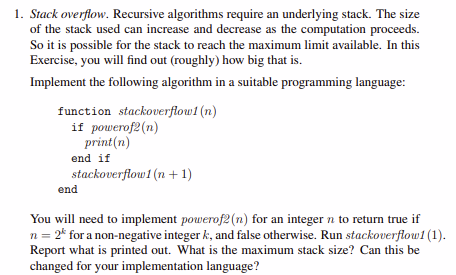

In [2]:

function pow2(n)
    for i in 0:n
        if 2^i==n
            return true
        end
    end
    return false
end


function stackoverflow(n)
    if pow2(n)
        println(n)
    end
    stackoverflow(n+1)
end        


stackoverflow (generic function with 1 method)

In [3]:
stackoverflow(1)

1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768


LoadError: StackOverflowError:

stackoverflow(1) returns powers of 2 up to 32768. Once 32768 was reached, StackOverflowError was returned. This indicated that the maximum stack size available is 32768. Powers up to 4096 printed within a few seconds, but as 32768 approached the time to go from 8192 to 16284, and then 16284 to 32768 was closer to minutes. As we reached the maximum stack size the computation took longer.

# Question 2 
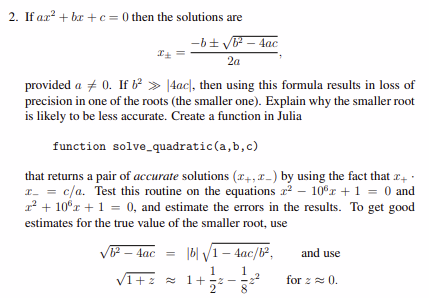

In [17]:
function solvequad(a,b,c)
    x1 = (-b + (b^2-4*a*c)^(1/2))/(2*a)
    x2 = (-b - (b^2-4*a*c)^(1/2))/(2*a)
    check1=(c/a-x1*x2)
    ###
    z = (4*a*c)/b^2
    if z<=10^-3
        taylorz = 1 - 1/2*z - 1/8*z^2 
        est = abs(b)*taylorz
        x1est = (-b+est)/(2a)
        x2est = (-b-est)/(2a)
    end
    check2=(c/a-x1est*x2est)
    if abs(check1) < abs(check2)
        accuracy = "Check 1 is better"
    end
    if abs(check2) < abs(check1)
        accuracy = "Check 2 is better"
    end
    if abs(check2) == abs(check1)
        accuracy = "Both methods are equal"
    end

    
    return println("\nRoot 1: $x1 \nRoot 2: $x2 \nCheck: $check1  \n***\nEstimated Root 1: $x1est \nEstimated Root 2: $x2est \nCheck: $check2 \n\n$accuracy \
        \nThe error is $((abs(check2)-abs(check1)))")
end
solvequad(1,10^6,1)
print(4*10^-5)


Root 1: -1.00000761449337e-6 
Root 2: -999999.999999 
Check: -7.614492369967252e-6  
***
Estimated Root 1: -9.999494068324566e-7 
Estimated Root 2: -999999.999999 
Check: 5.059316854338913e-5 

Check 1 is better 
The error is 4.297867617342188e-5
4.0e-5

The smaller root is going to have a greater loss in percision. This is because when b is large,  $\sqrt{b^2-4ac} \to b $ , so $b-\sqrt{b^2-4ac} \to 0$ . When using the taylor approximation for $\sqrt{1+z} = 1+\frac{1}{2}z-\frac{1}{8}z^2+O(h^3)$, the error is allowed to be at most order 3. The error we produced is ~$4*10^{-5}$, which is a much smaller error than what we are promised by the taylor approximation. 

#### ***Might need to do more on a white board to have better / more elegant explanation

# Question 3
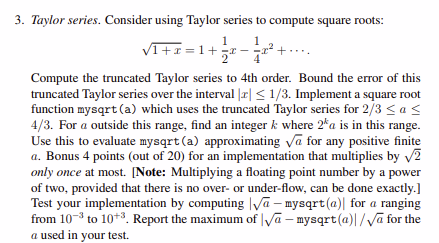

In [3]:
function taylorsqrt(x)
    a = 0
    f = (1+a)^(1/2)
    f1 = 1/2*(1+a)^(-1/2)
    f2 = -1/4*(1+a)^(-3/2)
    f3 = 3/8*(1+a)^(-5/2)
    f4 = -15/16*(1+a)^(-7/2)
    sqrt1x = f*x^0 + f1*x^1 + f2*x^2/factorial(2) + f3*x^3/factorial(3) + f4*x^4/factorial(4)
    return sqrt1x
end

print(taylorsqrt(1/3),"\n",(1+1/3)^(1/2))


####### confused why sqrt(1+x) but want sqrt(x)

1.154610339506173
1.1547005383792515

In [101]:
function mysqrt(a,k)
    k = typeof(a)(k)
    if 2/3<= a && a<=4/3
        answer = taylorsqrt(a)
        return(answer)
    end
    
    while a<(2/3)
        k = (k+1)
        a = 2^k*a
        return(println("k=",k))
    end
    
    mysqrt(a,k)
    while a > 4/3
        k= (k-1)
        a = 2^k*a
        mysqrt(a,k)
        return(println("k=",k))
    end    
end
##### Works for within range, flaw with the other two

mysqrt (generic function with 2 methods)

In [100]:
print(mysqrt(1/3,0),"\n")
print(taylorsqrt(1/3))

k=1.0
nothing
1.154610339506173

In [62]:
k=0
b = 1/3
typeof(b)
print(typeof(b),"\n",mysqrt(b,k),"\n",taylorsqrt(b),"\n")

Float64
1.0
1.154610339506173


# Question 4 
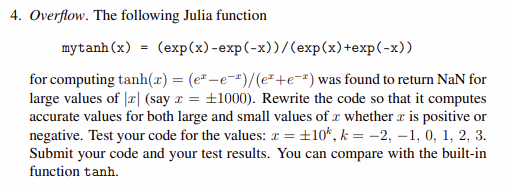


In [89]:
function mytanh(x)
    return ((exp(x)-exp(-x))/(exp(x)+exp(-x)))
end

function correctedmytanh(x)
    if x>0
        return ( (1-exp(-2*x) )/(1+exp(-2*x) ))
    end
    if x<=0
        return ( (exp(2*x)-1 )/(exp(2*x)+1 ))
    end
    
end

for i in -1:2:1
    for k in -2:3
        b = i*10.0^k
    println("x = ",i,"*10^",k, "\nmytan(x) = ",mytanh(b),"\ncorrectedtan(x) = ",correctedmytanh(b), "\ntanh(x) = ",tanh(b),"\n\n")
    end
end


x = -1*10^-2
mytan(x) = -0.00999966667999938
correctedtan(x) = -0.009999666679999485
tanh(x) = -0.009999666679999462


x = -1*10^-1
mytan(x) = -0.0996679946249559
correctedtan(x) = -0.09966799462495585
tanh(x) = -0.09966799462495582


x = -1*10^0
mytan(x) = -0.7615941559557649
correctedtan(x) = -0.7615941559557649
tanh(x) = -0.7615941559557649


x = -1*10^1
mytan(x) = -0.9999999958776926
correctedtan(x) = -0.9999999958776927
tanh(x) = -0.9999999958776927


x = -1*10^2
mytan(x) = -1.0
correctedtan(x) = -1.0
tanh(x) = -1.0


x = -1*10^3
mytan(x) = NaN
correctedtan(x) = -1.0
tanh(x) = -1.0


x = 1*10^-2
mytan(x) = 0.00999966667999938
correctedtan(x) = 0.009999666679999485
tanh(x) = 0.009999666679999462


x = 1*10^-1
mytan(x) = 0.0996679946249559
correctedtan(x) = 0.09966799462495585
tanh(x) = 0.09966799462495582


x = 1*10^0
mytan(x) = 0.7615941559557649
correctedtan(x) = 0.7615941559557649
tanh(x) = 0.7615941559557649


x = 1*10^1
mytan(x) = 0.9999999958776926
correctedtan(x) = 0.9999999

# Question 5
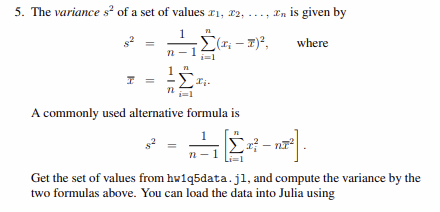
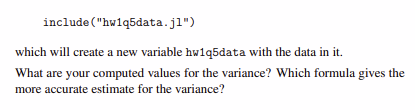